# Polling vs. Economic data graph

Models consistently preferred polling data about the economy over actual economic data. Polling data was also multi colinear with the economic data. Visualizing the polling data vs the economic data to try to visualize why the models might have preferred the polling data.

#### load packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# makes the figures higher quality.
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
# load custom style
import matplotlib.style as style
plt.style.use("markerr.mplstyle")

#### load data

In [2]:
texas_data = pd.read_csv('merged_texas_data.csv', index_col = 0,
                   parse_dates = ['Time']
                  )

econ = pd.read_csv('key_econ.csv', index_col = 0,
                  parse_dates = ['Time'])

#### shrink data to relevant features

In [3]:
econ = econ[['Time','Consumer Confidence Index TX', 
      'Consumer Price Index TX', 'Unemployment TX', 
      'Gross Value Natural Gas Production',]]


In [4]:
# create the net approval feature
texas_data['tx_net_approve'] = (texas_data['tx_is_better'] - 
                                              texas_data['tx_is_worse'])
texas_data = texas_data[['Time','tx_net_approve', 
                   'sap_case_shiller_index',]]


#### merge data to single dataframe

In [5]:
graph_df = econ.groupby('Time').mean().reset_index().merge(
    texas_data.groupby('Time').mean().reset_index(), on = 'Time').dropna()

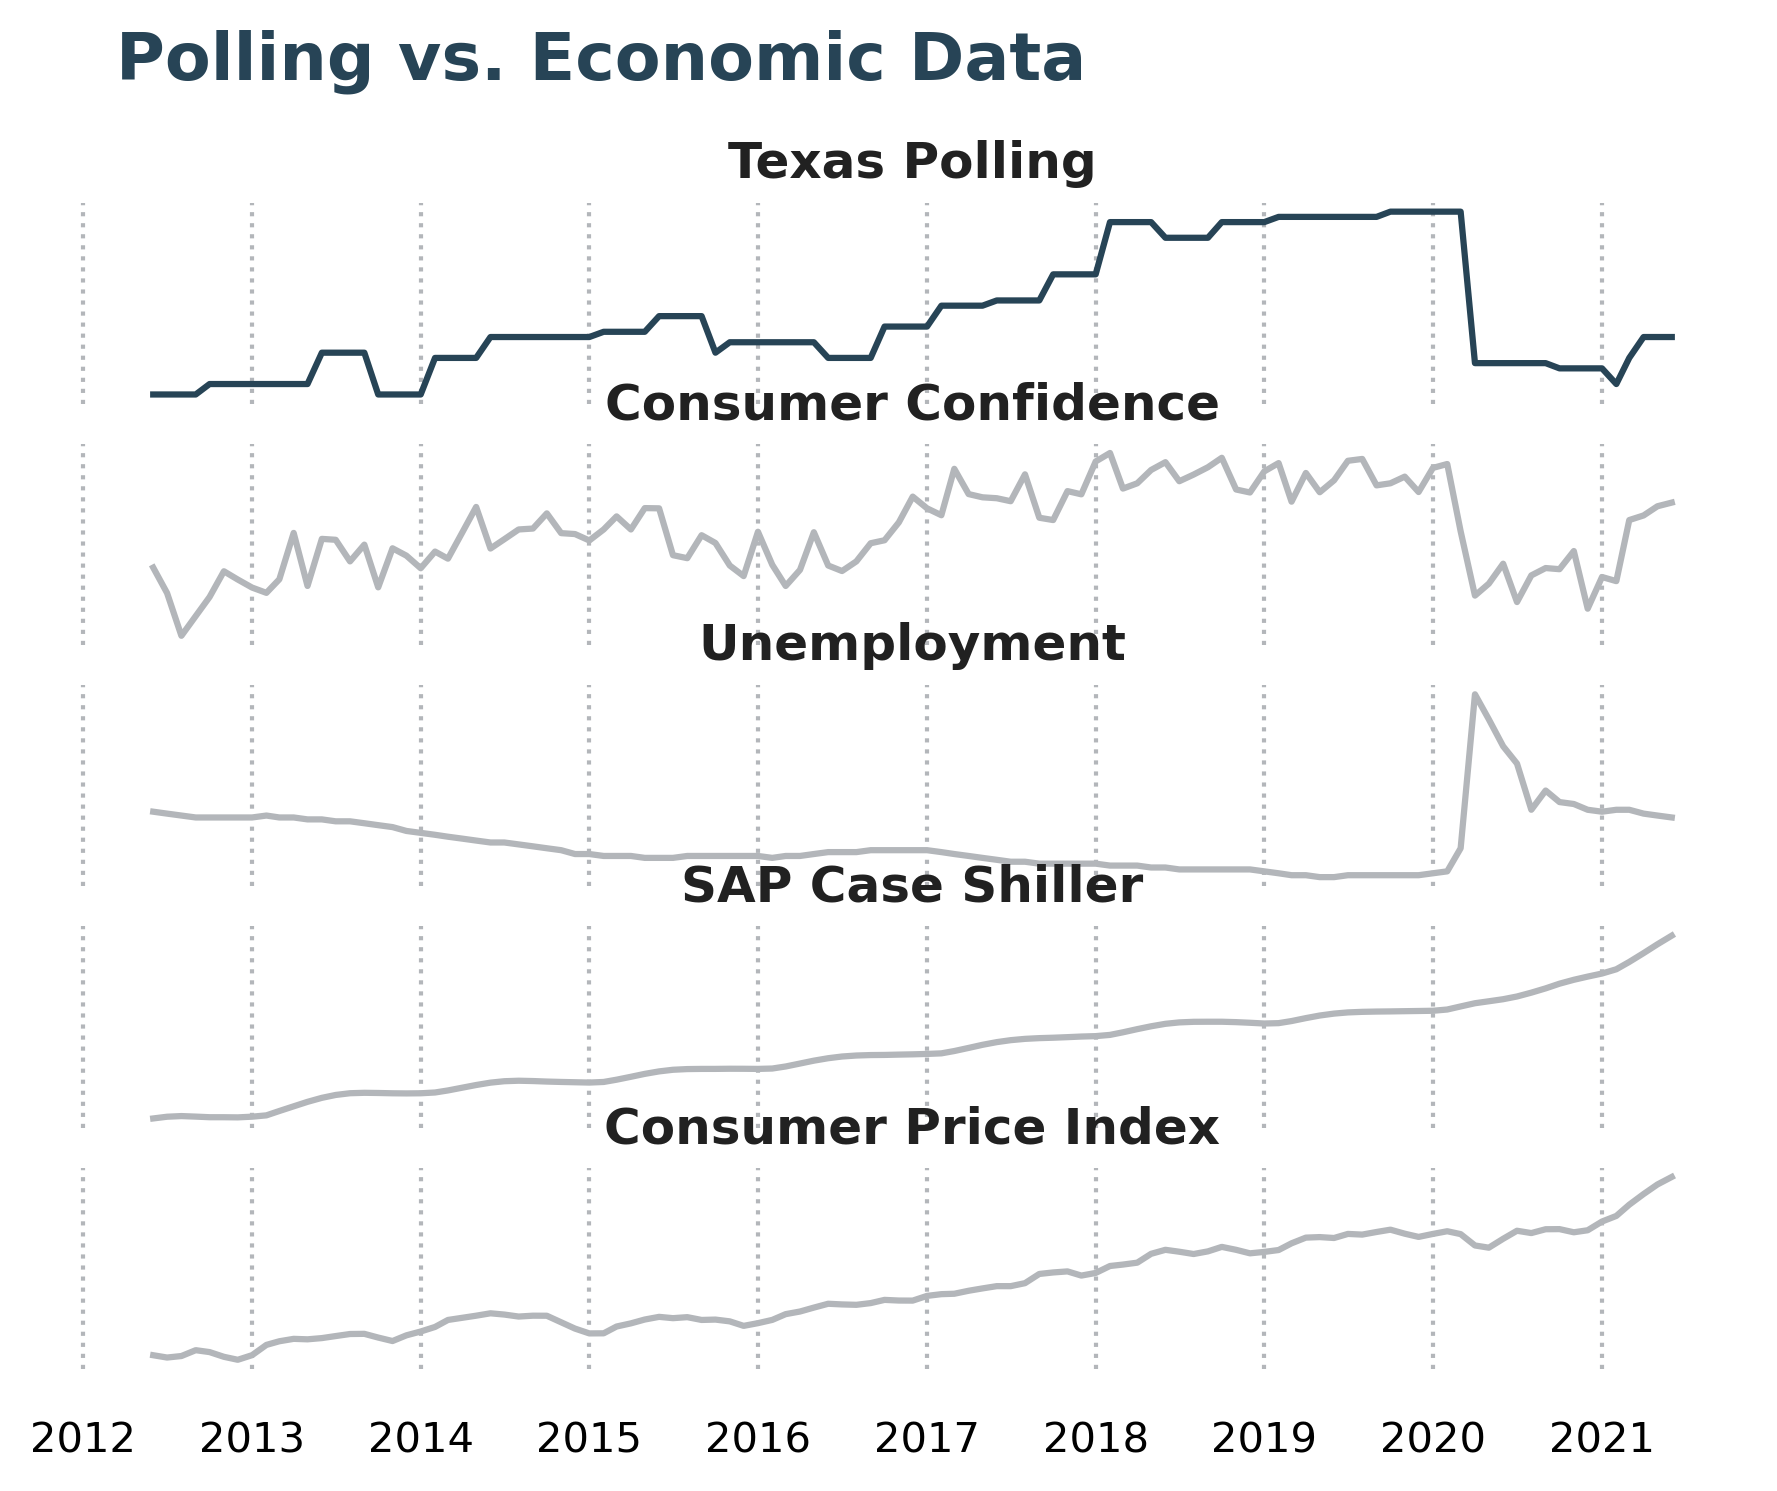

In [6]:
# make color palette
colors  = ['#274456','#7BA0C0','#93a1aa','#B3B6BA']
# create figure
fig, axs = plt.subplots(5,1,sharex = True)
# create each small subplot
# unemployment graph
g1 = sns.lineplot(data = graph_df, x = 'Time',y = 'Unemployment TX',
                  ax = axs[2], color = colors[3])
g1.title.set_text('Unemployment')
# SAP case shiller graph
g2 = sns.lineplot(data = graph_df, x = 'Time',y = 'sap_case_shiller_index',
                  ax = axs[3],color = colors[3])
g2.title.set_text('SAP Case Shiller')
# consumer price index graph
g3 = sns.lineplot(data = graph_df, x = 'Time',y = 'Consumer Price Index TX',
                  ax = axs[4],color = colors[3])
g3.title.set_text('Consumer Price Index')
# consumer confidence graph 
g4 = sns.lineplot(data = graph_df, x = 'Time',y = 'Consumer Confidence Index TX',
                  ax = axs[1],color = colors[3])
g4.title.set_text('Consumer Confidence')
# polling graph
g5 = sns.lineplot(data = graph_df, x = 'Time',y = 'tx_net_approve',
                  ax = axs[0], color = colors[0])
g5.title.set_text('Texas Polling')

# remove the x and y ticks
for ax in axs:
    ax.set_yticks([])
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)
# title.
fig.suptitle('Polling vs. Economic Data', fontsize=16, color = colors[0],
            x=0.1, y=1, horizontalalignment='left',fontweight = 'bold')

plt.show()